Mounting the Google Drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Importing Libraries

In [0]:
import matplotlib.pyplot as plt 
import numpy as np
from sympy import *
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

Defining hypothesis function Sigmoid : h(θ) = g(θ_transpose•X)

In [0]:
import sympy

def cal_h(value,X):
    t = np.dot(value,X)
    d = sympy.exp(-t)
    h = 1/(1+d)
    return float(h)

Function for Stochastic Descent.

In [0]:
def Classifier(y,X,N,a,size):
  
  value = [5]*size
  temp = [0]*size
  
  for i in range(1000):
    number = random.randint(0,N-1)
    h_theta = cal_h(value,X[number,:])
    for j in range(len(value)):
      temp[j] = value[j] +a*(y[number] - h_theta)*X[number][j]
    value = temp
  return value

Dataset 1

In [0]:
import pandas as pd
import random

df = pd.read_excel('/content/drive/My Drive/IE406- ML- Labs/Lab 3/ex2data1-logistic.xls')
x1 = np.array(df['x1'])
x1 = (x1-x1.mean())/np.sqrt(x1.var())
x2 = np.array(df['x2'])
x2 = (x2-x2.mean())/np.sqrt(x2.var())
y = np.array(df['y'])

In [88]:
x1_0 = []
x1_1 = []
x2_1 = []
x2_0 = []
for i in range (len(x1)):
  if y[i]:
    x1_1.append(x1[i])
    x2_1.append(x2[i])
  else:
      x1_0.append(x1[i])
      x2_0.append(x2[i])

temp = np.ones((len(x1),1))
X = np.c_[temp,x1,x2]

h = Symbol('h')

theta = Classifier(y,X,len(X),0.01,3)
a = np.array([min(x1),max(x1)])
b = (-theta[0]-theta[1]*a)/theta[2]

count = 0;
i = random.sample(range(0, len(X)-1), 10)
for j in range (len(i)):
  prob = cal_h(theta,X[i[j]])
  if prob>=0.5 and y[i[j]] == 1:
    count = count+1
  if prob<0.5 and y[i[j]] == 0:
    count = count+1

print('Accuracy =',count/len(i)*100,'%')

Accuracy = 90.0 %


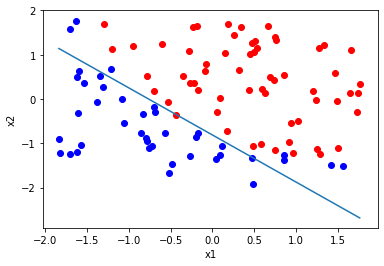

In [89]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1_0, x2_0, color= "blue")
ax1.scatter(x1_1, x2_1, color= "red")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.plot(a,b)
plt.show()

Dataset 2

In [91]:
import pandas as pd
import random

df = pd.read_excel('/content/drive/My Drive/IE406- ML- Labs/Lab 3/ex2data2-logistic.xls')
x1 = np.array(df['x1'])
x1 = (x1-np.mean(x1))/np.std(x1)
x2 = np.array(df['x2'])
x2 = (x2-np.mean(x2))/np.std(x2)
y = np.array(df['y'])

x1_0 = []
x1_1 = []
x2_1 = []
x2_0 = []
for i in range (len(x1)):
  if y[i]:
    x1_1.append(x1[i])
    x2_1.append(x2[i])
  else:
      x1_0.append(x1[i])
      x2_0.append(x2[i])
      
temp = np.ones((len(x1),1))
X = np.c_[temp,x1,x2,np.square(x1),np.square(x2),x1*x2,np.square(x1)*x2,np.square(x2)*x1]


theta = Classifier(y,X,len(X),0.01,8)
print('Theta =',theta)  

Theta = [2.346936638175027, 3.2983006018212997, 3.5420793037909446, 0.5850468822415829, 1.2980304566649914, 5.4912402654455335, 4.038221691542723, 3.8036450624372335]


In [92]:
z = np.arange(min(x1),max(x1),0.01)
a = theta[7]*z + theta[4]
b = theta[2] + theta[5]*z + theta[6]*np.square(z)
c = theta[0] + theta[1]*z + theta[3]*np.square(z)

roots = np.zeros((len(z),2))
for i in range (len(z)):
  roots[i] = np.roots([a[i],b[i],c[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


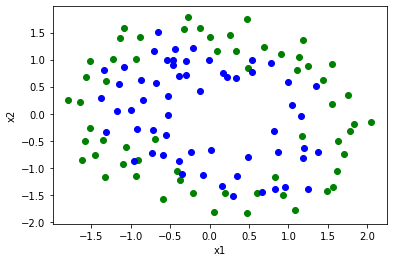

In [93]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1_0, x2_0, color= "green")
ax1.scatter(x1_1, x2_1, color= "blue")
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

plt.show()

In [94]:
count = 0;
i = random.sample(range(0, len(X)-1), 10)
for j in range (len(i)):
  prob = cal_h(theta,X[i[j]])
  if prob>=0.5 and y[i[j]] == 1:
    count = count+1
  if prob<0.5 and y[i[j]] == 0:
    count = count+1

print('Accuracy =',count/len(i)*100,'%')


Accuracy = 60.0 %


**---------------------- END OF CODE ----------------------**